<p style="font-family: Arial; font-size:1.4em;color:black;"><h1><center>Final Project Analysis</center></h1></p>
<p style="font-family: Arial; font-size:1.4em;color:black;">Name : Dinesh Pundamalli<br>Batch : G27 Python</p>
<h1 style='text-align: left;'>Problem Statement</h1>
<p >
    You have the 'bank-full.csv' dataset, and your task is to build a machine learning model to predict the 'y' column using these classification algorithms: Logistic Regression, Naive Bayes, SVC Classifier, Decision Tree Classifier, and Random Forest Classifier. Summarize the key steps:
    
Data Handling: How do you load the dataset and designate 'y' as the target variable?

Data Cleaning: Describe how you'd remove useless columns, eliminate those with unique values, and handle missing data.

Data Visualization: What visualizations would you use for numerical and categorical data?

Data Analysis: Explain univariate, bivariate analysis, and any insights related to the business.

Data Preprocessing: Do you need label encoding, one-hot encoding, standardization, or normalization?

Model Implementation: Briefly outline how you'd implement the mentioned classification algorithms.

Model Validation: Mention the metrics used, especially the R2 score interpretation.

Model Comparison: How would you compare R2 scores and execution speeds to choose the best model?
</p>
<h1 style='text-align: left;'>Data Handling</h1>

In [2]:
#importing required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
pd.read_csv("bank-full.csv").head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


In [4]:
df=pd.read_csv("bank-full.csv",delimiter=";")

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<h3 style='text-align: left;'>Analysis</h3>
<ul>
    <li>The given bank data is not in proper way.</li>
    <li>Delimiter parameter is used to make the CSV file appropriate.</li>
    <li>Taken the head of the dataset.</li>
</ul>
</div>
<h1 style='text-align: left;'>Data Cleaning</h1>

In [6]:
df.shape

(45211, 17)

In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [9]:
#Designating y as target variable
y=df[["y"]]

In [10]:
y.head()

,y
0,no
1,no
2,no
3,no
4,no


In [57]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [69]:
#splitting the dataset into numerical and categorical
num_data=df.select_dtypes(np.number)
cat_data=df.select_dtypes(np.object_)

In [59]:
num_data.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [60]:
cat_data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [61]:
#Finding the unique values in each column of categorical data
for i in cat_data.columns:
    print("Number of unique values in {} column are {} \n The Unique values are {}" 
          .format(i,len(cat_data[i].unique()),cat_data[i].unique()))
    print("------------------------\n")

Number of unique values in job column are 12 
 The Unique values are ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
------------------------

Number of unique values in marital column are 3 
 The Unique values are ['married' 'single' 'divorced']
------------------------

Number of unique values in education column are 4 
 The Unique values are ['tertiary' 'secondary' 'unknown' 'primary']
------------------------

Number of unique values in default column are 2 
 The Unique values are ['no' 'yes']
------------------------

Number of unique values in housing column are 2 
 The Unique values are ['yes' 'no']
------------------------

Number of unique values in loan column are 2 
 The Unique values are ['no' 'yes']
------------------------

Number of unique values in contact column are 3 
 The Unique values are ['unknown' 'cellular' 'telephone']
------------------------

Number of unique 

<h3 style='text-align: left;'> Analysis</h3>
<ul>
    <li>No null vlues the dataset.</li>
    <li>There are 10 Categorical columns and 7 Numeric values in dataset.</li>
    <li>Taken "y" column as Target Variable.</li>
    <li>Listed the Unique values from each Categorical column.</li>
</ul>
<h1 style='text-align: left;'>Data Visualization & Analysis</h1>

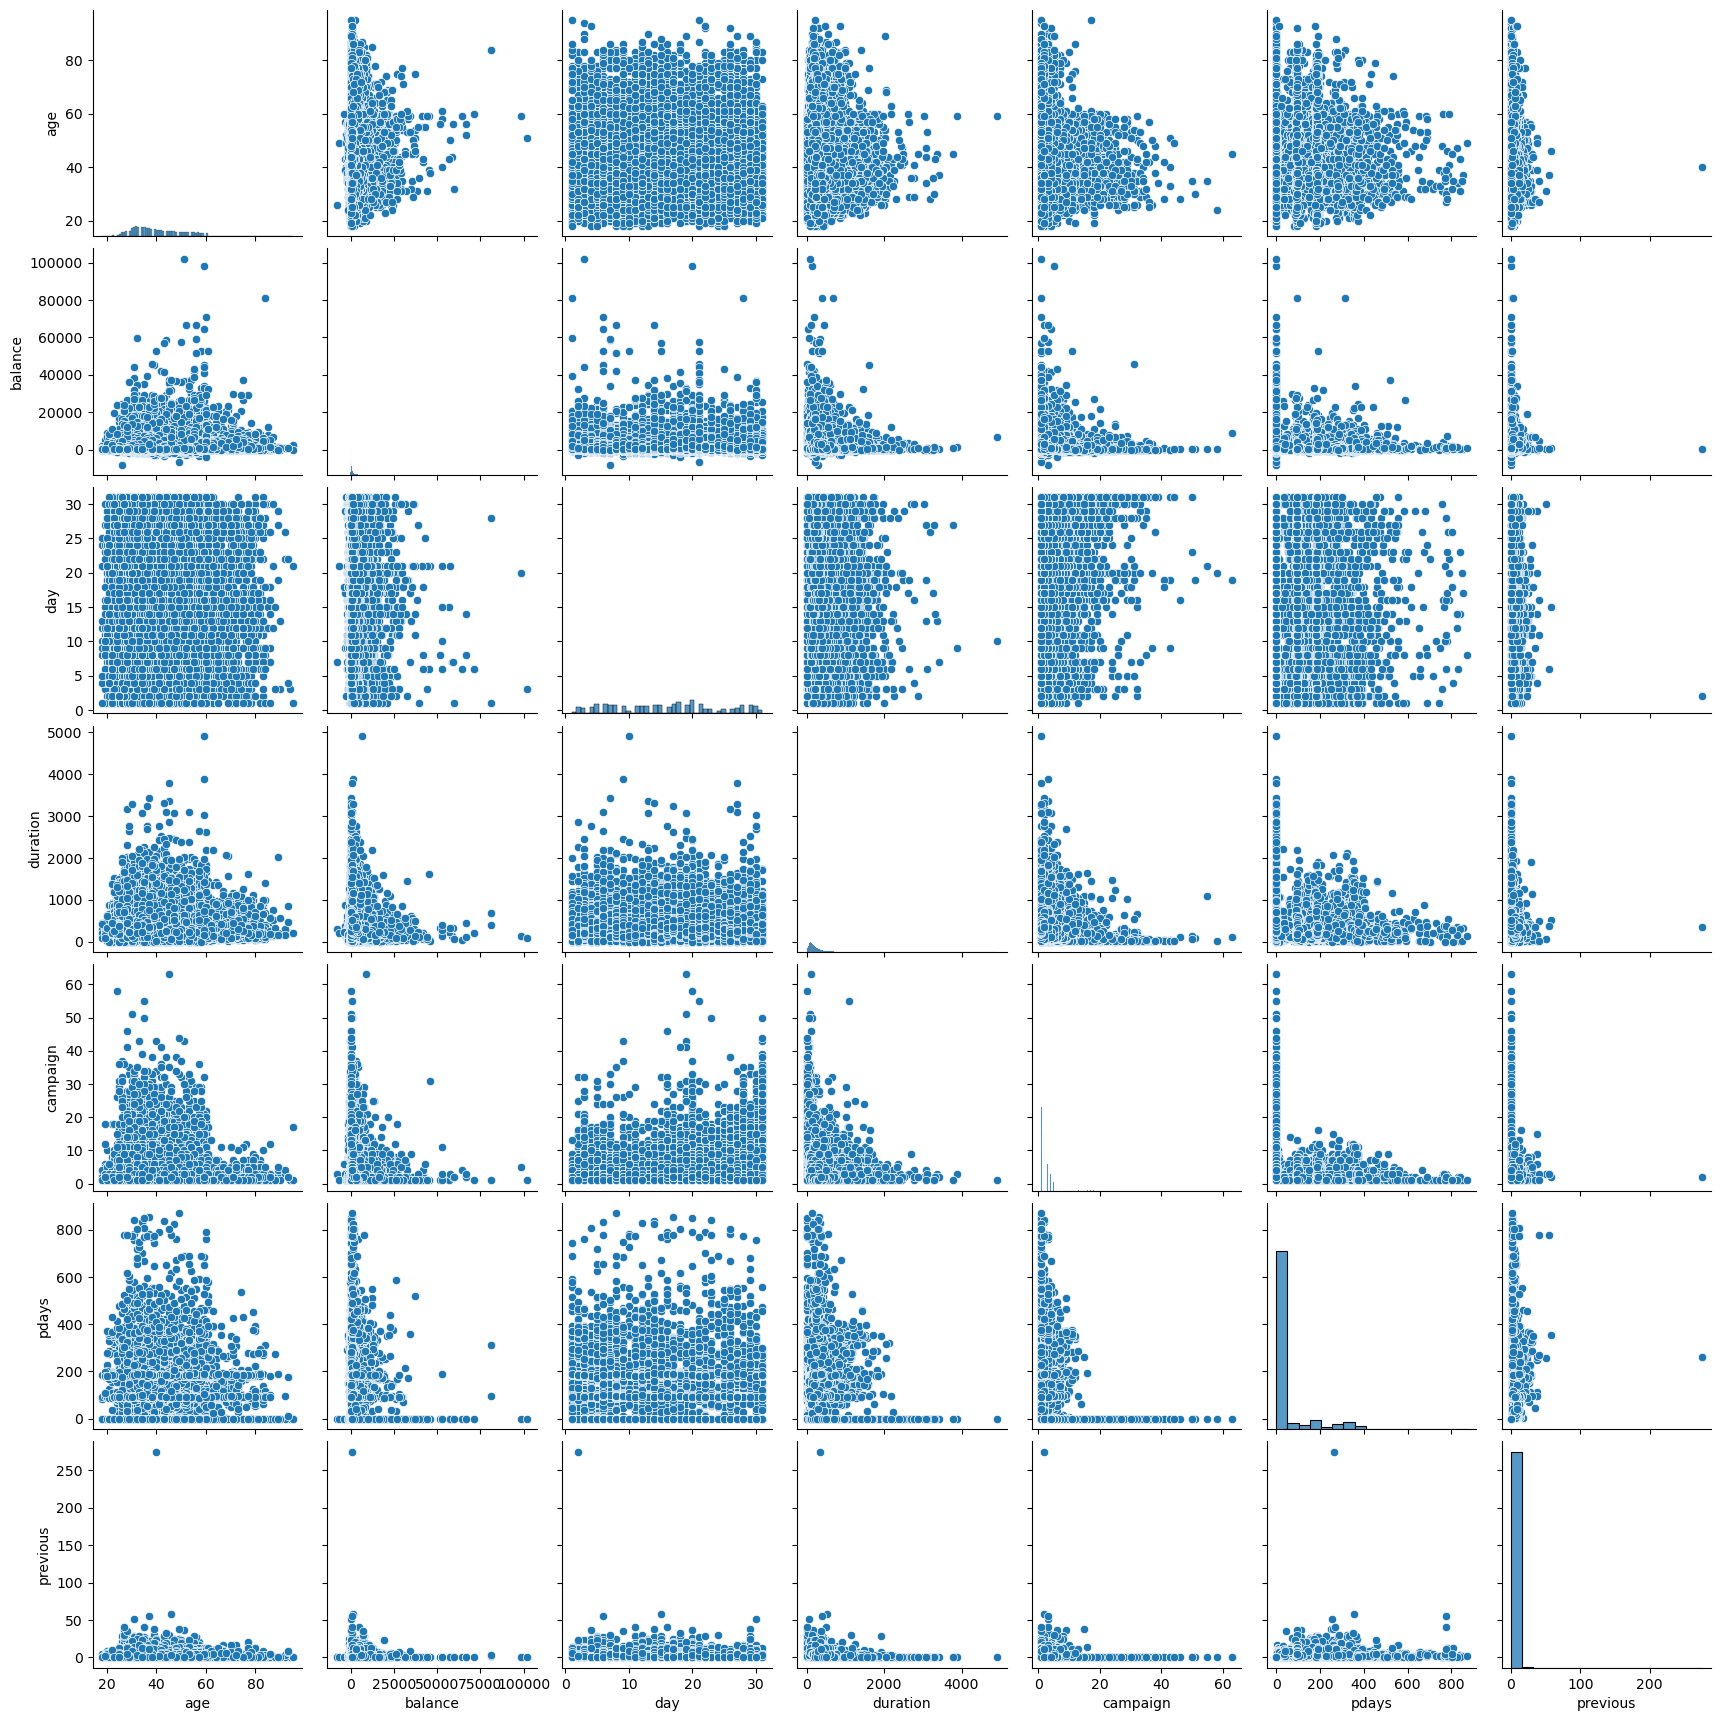

In [62]:
#Plotting pairplot
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(num_data)
plt.show()

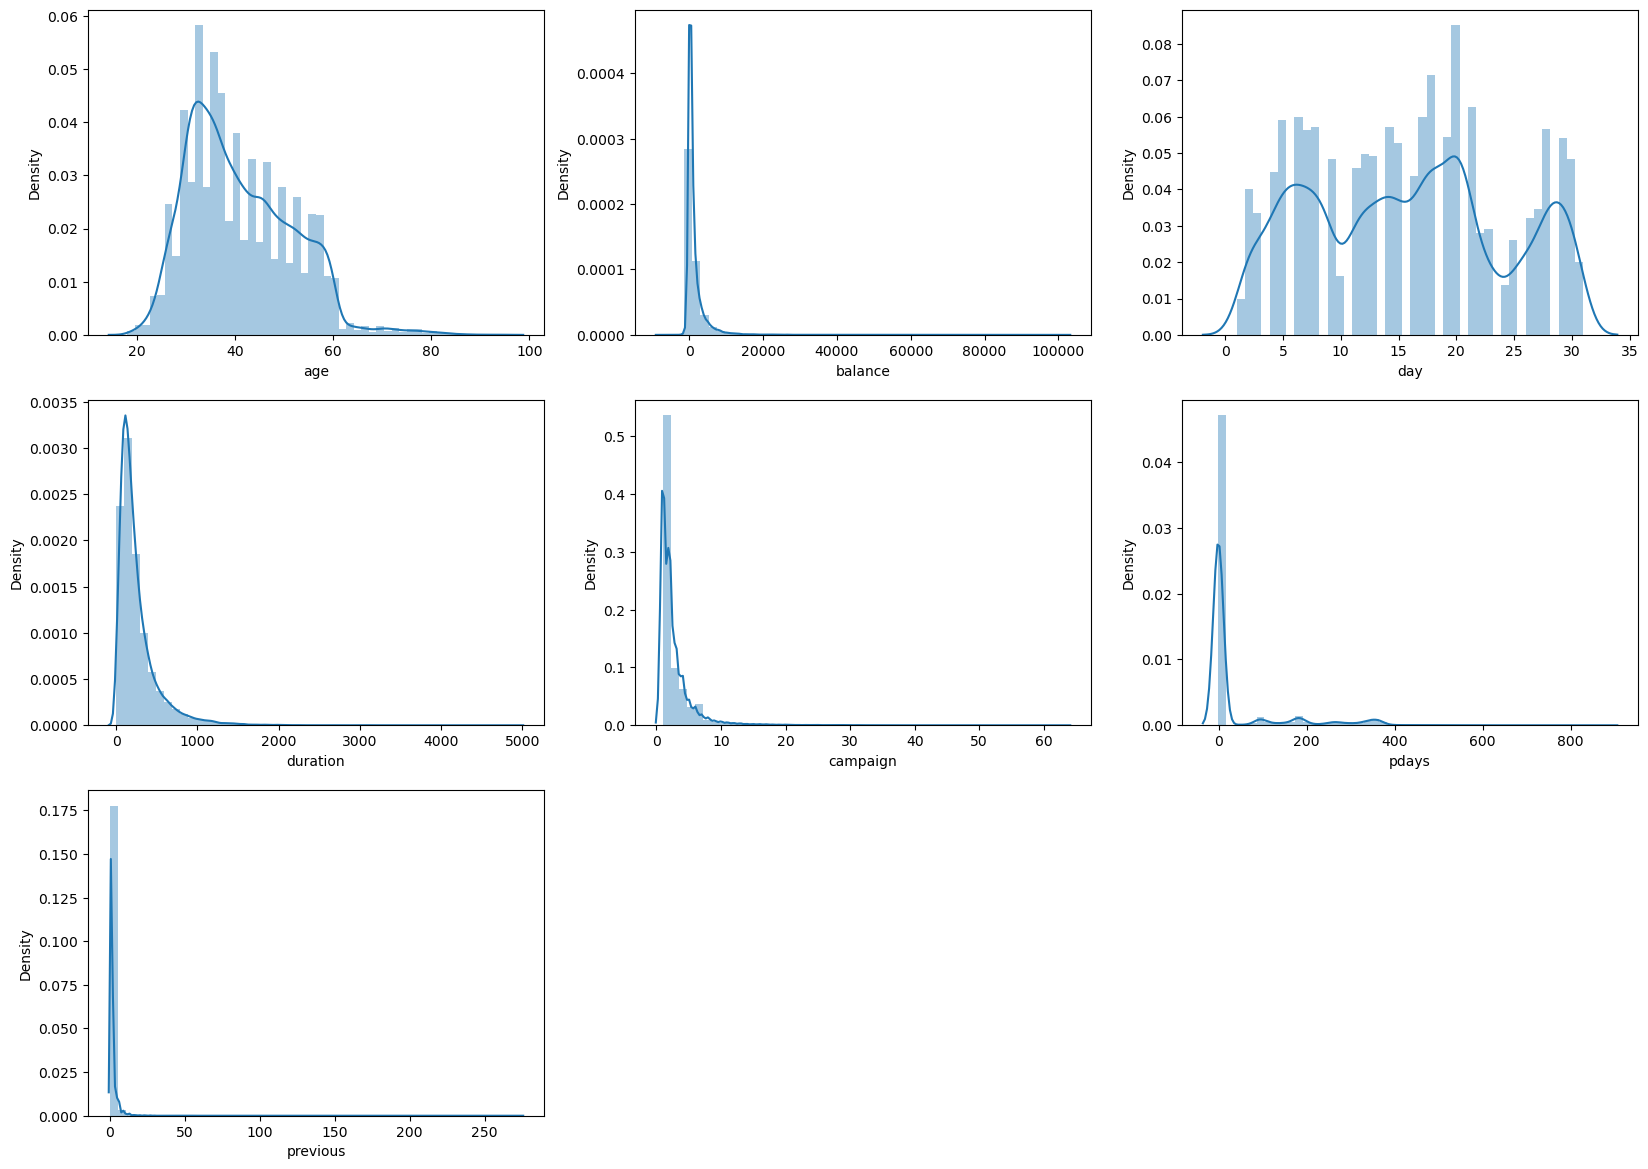

In [63]:
#plotting distplot
plt.figure(figsize=(20,60),facecolor="white")
plotnumber=1
for num_data in num_data:
    ax=plt.subplot(12,3,plotnumber)
    sns.distplot(df[num_data])
    plt.xlabel(num_data)
    plotnumber+=1
plt.show()

<Axes: xlabel='y', ylabel='age'>

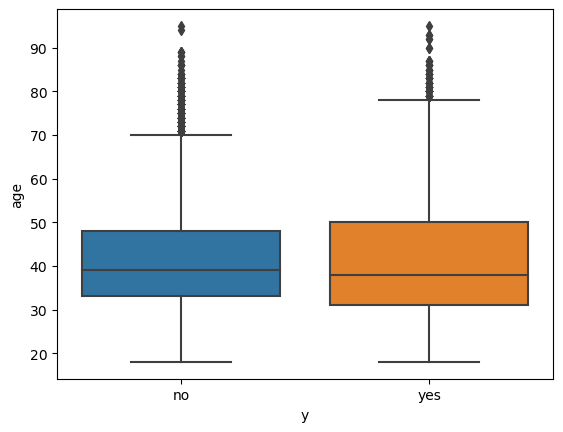

In [64]:
#plotting boxplot for age with respect to target variable
sns.boxplot(data=df, x="y", y="age")

<function matplotlib.pyplot.show(close=None, block=None)>

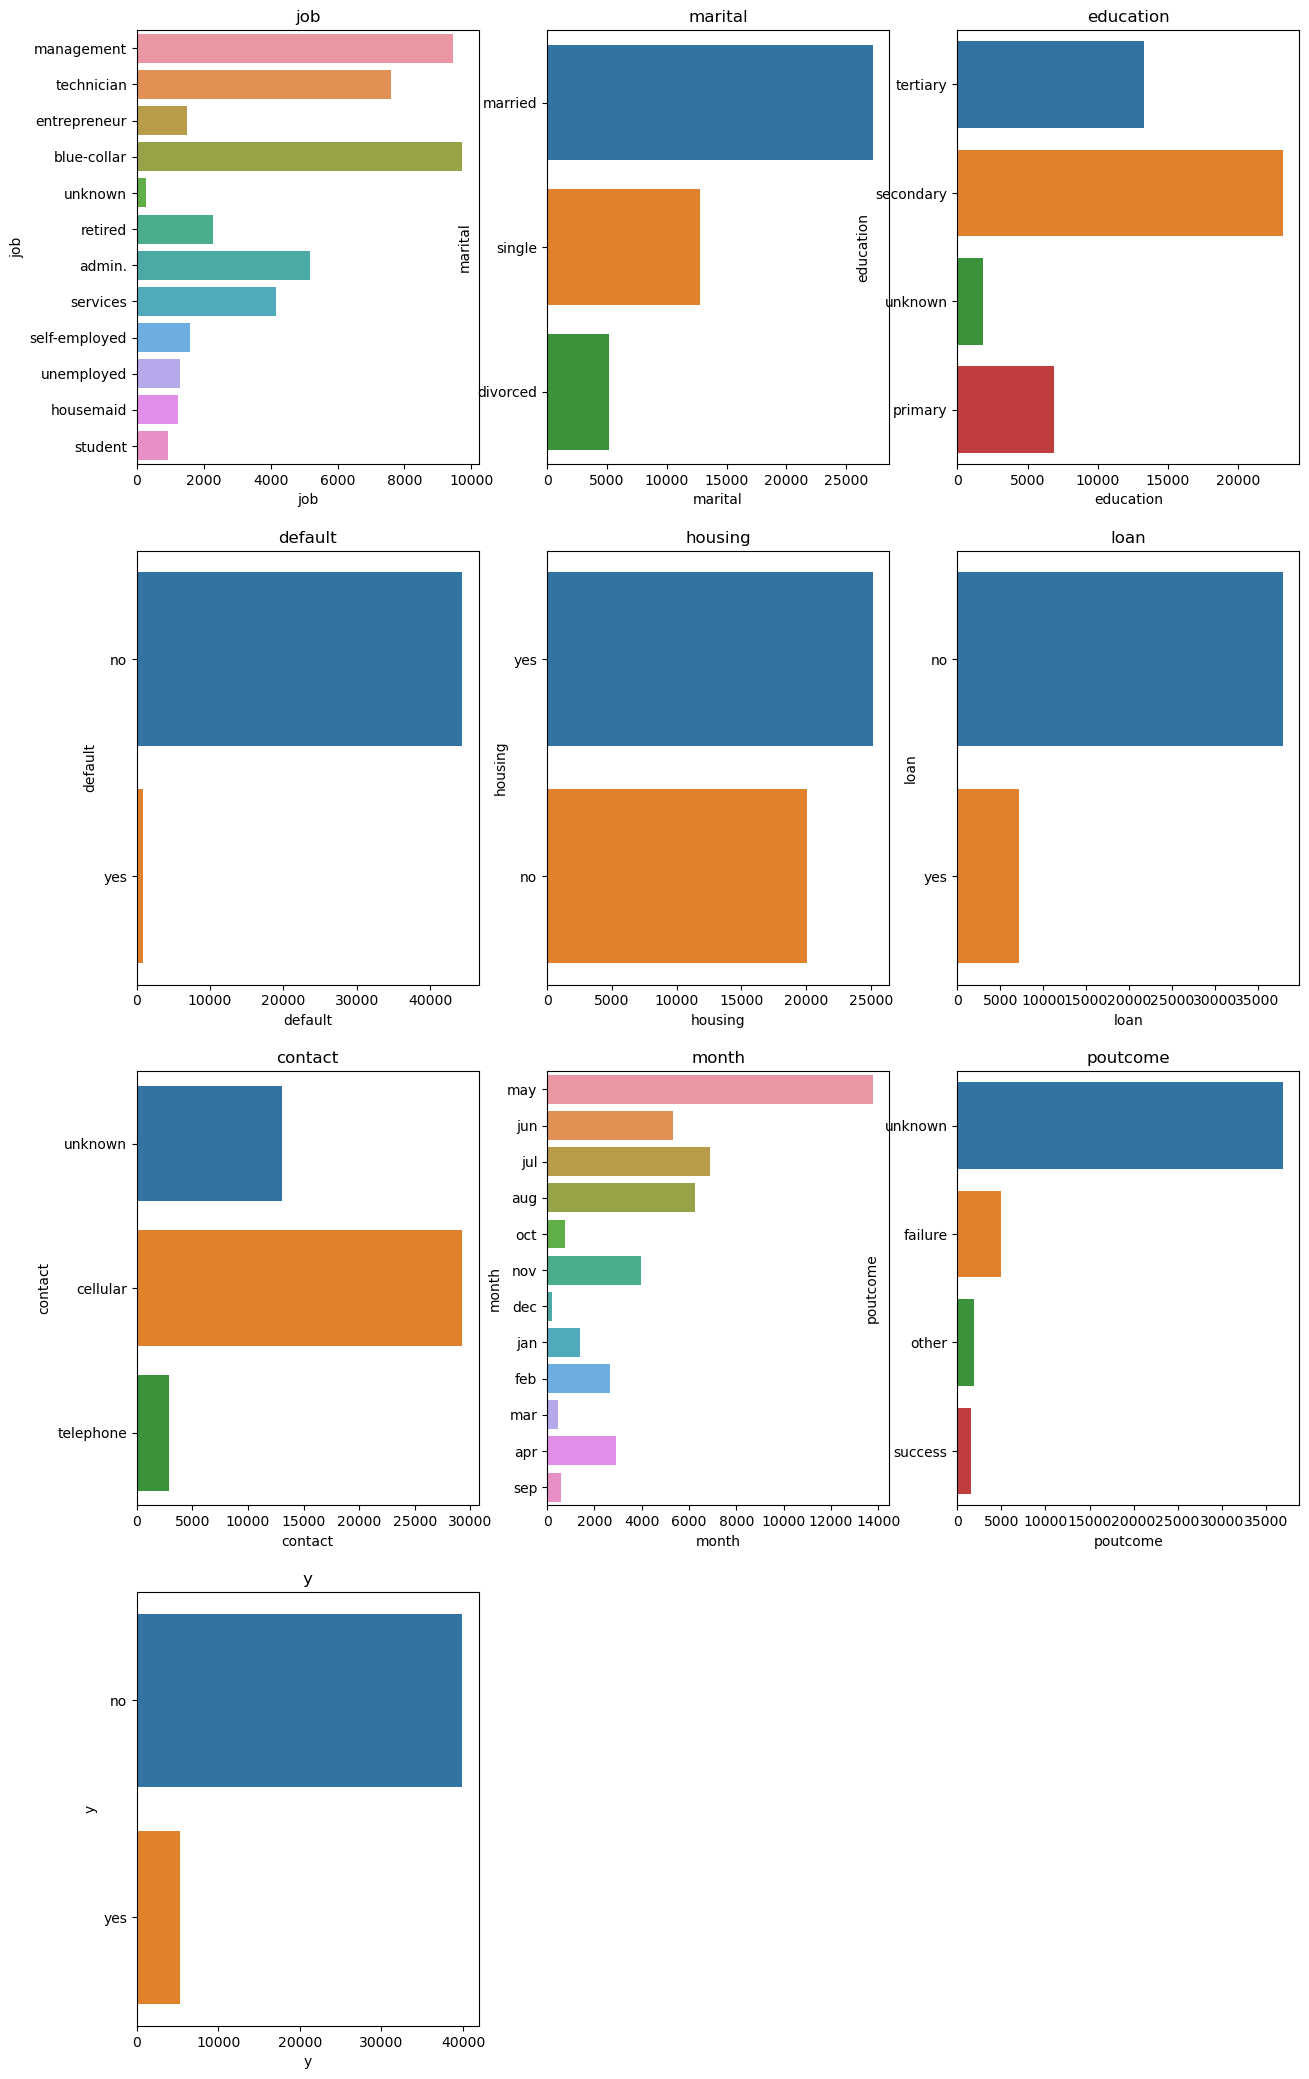

In [65]:
#plotting countplot 
plt.figure(figsize=(15,80),facecolor="white")
plotnumber=1
for cat_data in cat_data:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=cat_data,data=df)
    plt.xlabel(cat_data)
    plt.title(cat_data)
    plotnumber+=1
plt.show

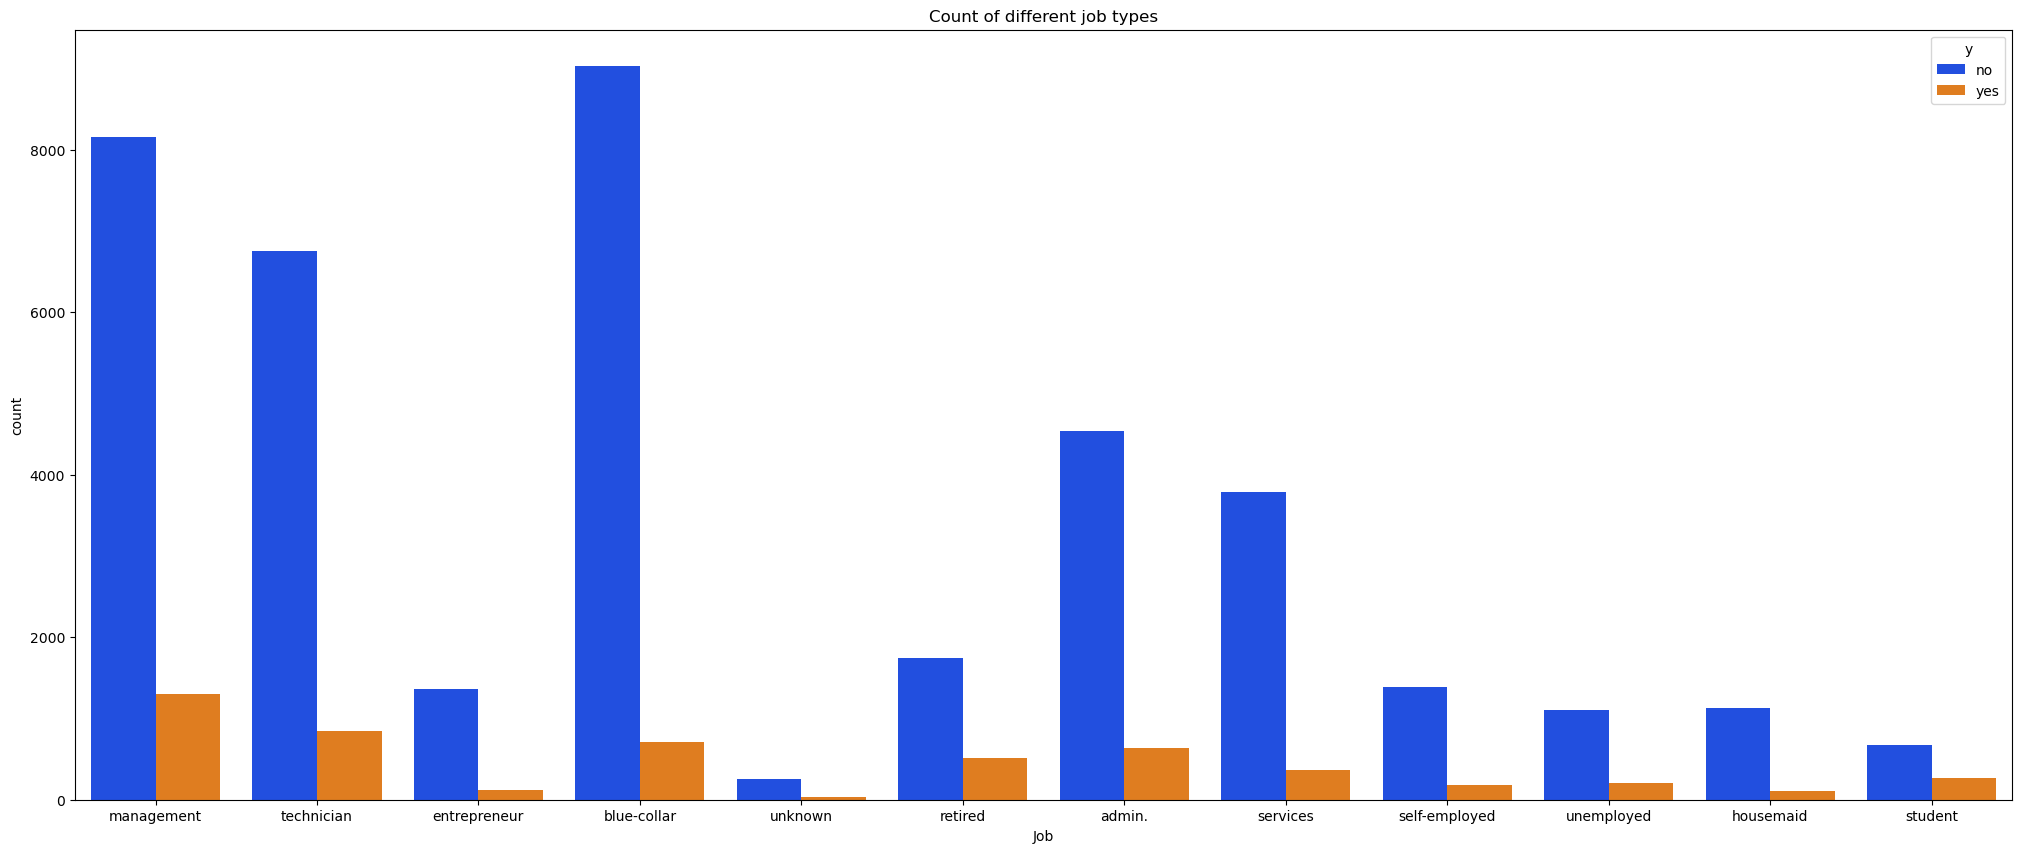

In [66]:
plt.figure(figsize=(25, 10))
sns.countplot(data=df, x='job', hue='y', palette='bright')
plt.xlabel('Job')
plt.title('Count of different job types')
plt.show()

<Axes: >

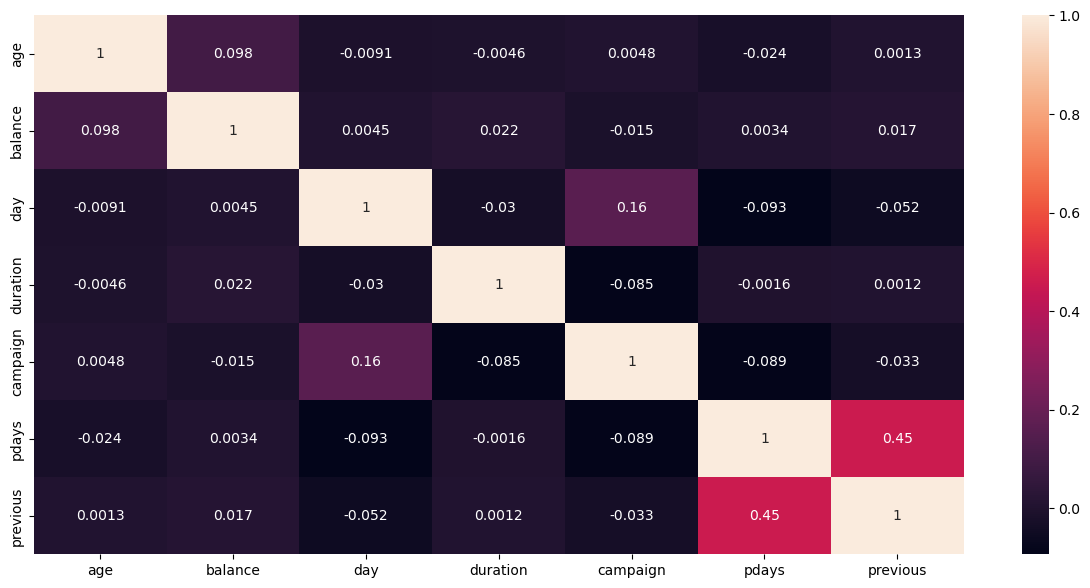

In [146]:
#Finding Co-relation between the columns
cor_mat=df.corr()
fig=plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

<h3 style='text-align: left;'>Analysis</h3>
<ul>
    <li>Observed the data has  more percentage of no than yes.</li>
    <li>Found Outliers in data.</li>
    <li>Not any feature is co related with eah other.</li>
    <li>By analysing data,Understood the "y" column might be about Fixed deposit or Insurance.</li>
    <li>So,The plots shows that retired people,admin,blue-collar jobholders are showing interest than others.</li>
    <li>The people who were taken housing loan are saying no. </li>
</ul>
<h1 style='text-align: left;'>Data Preprocessing</h1>

In [160]:
cat_data=df.select_dtypes(np.object_)

In [161]:
cat_data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [162]:
cat_data.shape

(45211, 10)

In [72]:
def feature_value(x):
    x=x.value_counts().count()
    return x
cat_feature=pd.DataFrame(cat_data.apply(lambda x: feature_value(x)))

In [73]:
cat_feature.columns=["feature_value"]

In [74]:
cat_feature

,feature_value
job,12
marital,3
education,4
default,2
housing,2
loan,2
contact,3
month,12
poutcome,4
y,2


In [75]:
cat_data=cat_data.drop(["y"],axis=1)

In [76]:
cat_data["loan"].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [77]:
cat_data["loan"]=np.where(cat_data["loan"]=="yes",1,0)

In [78]:
cat_data["loan"].value_counts()

0    37967
1     7244
Name: loan, dtype: int64

In [79]:
cat_data["default"].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [80]:
cat_data["default"]=np.where(cat_data["default"]=="yes",1,0)

In [81]:
cat_data["default"].value_counts()

0    44396
1      815
Name: default, dtype: int64

In [82]:
cat_data["housing"].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [83]:
cat_data["housing"]=np.where(cat_data["housing"]=="yes",1,0)

In [84]:
cat_data["housing"].value_counts()

1    25130
0    20081
Name: housing, dtype: int64

In [85]:
cat_data.select_dtypes(np.object_).columns

Index(['job', 'marital', 'education', 'contact', 'month', 'poutcome'], dtype='object')

In [86]:
cat_data.drop(["contact","month"],axis=1,inplace=True)

In [87]:
cat_data.head()

,job,marital,education,default,housing,loan,poutcome
0,management,married,tertiary,0,1,0,unknown
1,technician,single,secondary,0,1,0,unknown
2,entrepreneur,married,secondary,0,1,1,unknown
3,blue-collar,married,unknown,0,1,0,unknown
4,unknown,single,unknown,0,0,0,unknown


In [88]:
cat_data.dtypes

job          object
marital      object
education    object
default       int32
housing       int32
loan          int32
poutcome     object
dtype: object

In [89]:
cat_data["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [90]:
cat_data["marital"].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [91]:
cat_data["education"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [92]:
cat_data["poutcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [93]:
cat_obj=cat_data.select_dtypes(np.object_)
cat_num=cat_data.select_dtypes(np.number)

In [94]:
cat_num.head()

,default,housing,loan
0,0,1,0
1,0,1,0
2,0,1,1
3,0,1,0
4,0,0,0


In [95]:
cat_obj.head()

,job,marital,education,poutcome
0,management,married,tertiary,unknown
1,technician,single,secondary,unknown
2,entrepreneur,married,secondary,unknown
3,blue-collar,married,unknown,unknown
4,unknown,single,unknown,unknown


In [96]:
#One-hot encoding
cat_obj=pd.get_dummies(cat_obj,drop_first=True)

In [97]:
cat_obj.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1


In [98]:
cat_data=pd.concat([cat_num,cat_obj],axis=1)

In [99]:
cat_data.head()

,default,housing,loan,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,0,1,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
3,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1


In [100]:
#KBinsDiscretizer 
from sklearn.preprocessing import KBinsDiscretizer  
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal')
Xt=discretizer.fit_transform(num_data)
Xt=pd.DataFrame(Xt,index=num_data.index,columns=num_data.columns).add_suffix("_rank")
Xt.head()

,age_rank,balance_rank,day_rank,duration_rank,campaign_rank,pdays_rank,previous_rank
0,9.0,8.0,1.0,6.0,0.0,0.0,0.0
1,6.0,2.0,1.0,4.0,0.0,0.0,0.0
2,2.0,1.0,1.0,1.0,0.0,0.0,0.0
3,7.0,7.0,1.0,2.0,0.0,0.0,0.0
4,2.0,1.0,1.0,5.0,0.0,0.0,0.0


In [101]:
X=pd.concat([Xt,cat_data],axis=1)

In [102]:
X.head()

,age_rank,balance_rank,day_rank,duration_rank,campaign_rank,pdays_rank,previous_rank,default,housing,loan,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,9.0,8.0,1.0,6.0,0.0,0.0,0.0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1,6.0,2.0,1.0,4.0,0.0,0.0,0.0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
2,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0,1,1,...,0,0,1,0,1,0,0,0,0,1
3,7.0,7.0,1.0,2.0,0.0,0.0,0.0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
4,2.0,1.0,1.0,5.0,0.0,0.0,0.0,0,0,0,...,0,1,0,1,0,0,1,0,0,1


In [103]:
X.dtypes

age_rank               float64
balance_rank           float64
day_rank               float64
duration_rank          float64
campaign_rank          float64
pdays_rank             float64
previous_rank          float64
default                  int32
housing                  int32
loan                     int32
job_blue-collar          uint8
job_entrepreneur         uint8
job_housemaid            uint8
job_management           uint8
job_retired              uint8
job_self-employed        uint8
job_services             uint8
job_student              uint8
job_technician           uint8
job_unemployed           uint8
job_unknown              uint8
marital_married          uint8
marital_single           uint8
education_secondary      uint8
education_tertiary       uint8
education_unknown        uint8
poutcome_other           uint8
poutcome_success         uint8
poutcome_unknown         uint8
dtype: object

In [104]:
y.dtypes

y    object
dtype: object

In [105]:
y["y"]=y["y"].apply(lambda x:1 if x=="yes" else 0)

In [106]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [107]:
X.shape,y.shape

((45211, 29), (45211, 1))

In [108]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_forest=ExtraTreesClassifier(n_estimators=5,criterion="entropy",max_features=2)
extra_tree_forest.fit(X,y)
feature_importance=extra_tree_forest.feature_importances_
feature_importance_normalized=np.std([tree.feature_importances_ for tree in extra_tree_forest.estimators_],axis=0)
feature_importance_normalized

array([0.00279734, 0.00547628, 0.01809332, 0.00387183, 0.01386174,
       0.00399259, 0.00899754, 0.00108567, 0.00597238, 0.0038101 ,
       0.00230016, 0.00129649, 0.00078145, 0.00336505, 0.0010136 ,
       0.00095351, 0.00366066, 0.00155797, 0.00311358, 0.00103287,
       0.00025978, 0.00530286, 0.00278404, 0.00228428, 0.00162956,
       0.0015997 , 0.00165972, 0.0162926 , 0.01004826])

In [109]:
from imblearn.over_sampling import SMOTE
sampler =SMOTE()
X_smote,Y_smote=sampler.fit_resample(X,y)

In [110]:
print("Original dataset length ",len(X))
print("Resampled dataset length ",len(X_smote))
print("Original dataset length ",len(y))
print("Resampled dataset length ",len(Y_smote))

Original dataset length  45211
Resampled dataset length  79844
Original dataset length  45211
Resampled dataset length  79844


In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_smote,Y_smote,test_size=0.2,random_state=0)

In [112]:
X_train.shape

(63875, 29)

In [113]:
X_test.shape

(15969, 29)

In [114]:
y_test.shape

(15969, 1)

In [115]:
y_train.values.flatten()

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [116]:
y_train.shape

(63875, 1)

In [117]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_train_scaled

array([[-1.52075215,  1.12244558, -1.57012726, ...,  5.92175596,
        -0.25905371, -1.62379188],
       [-1.1888131 ,  0.74547941,  1.51169601, ..., -0.16886883,
        -0.25905371,  0.61584247],
       [ 0.80282123,  1.12244558,  1.51169601, ..., -0.16886883,
        -0.25905371,  0.61584247],
       ...,
       [-0.52493499, -0.30467131, -0.54285284, ..., -0.16886883,
        -0.25905371,  0.61584247],
       [ 1.46669934,  0.05210792,  1.1692712 , ..., -0.16886883,
        -0.25905371, -1.62379188],
       [ 1.46669934,  0.23762312,  1.1692712 , ..., -0.16886883,
        -0.25905371,  0.61584247]])

In [118]:
X_test_scaled

array([[ 0.80282123,  1.12244558, -1.22770246, ..., -0.16886883,
        -0.25905371,  0.61584247],
       [ 1.46669934,  0.82500537,  0.19894838, ..., -0.16886883,
        -0.25905371,  0.61584247],
       [-0.85687404,  1.12244558,  0.22881697, ..., -0.16886883,
        -0.25905371,  0.61584247],
       ...,
       [-0.6468988 ,  1.12244558, -0.88527765, ..., -0.16886883,
        -0.25905371, -1.62379188],
       [-1.1888131 ,  0.40888714,  1.51169601, ..., -0.16886883,
        -0.25905371, -1.62379188],
       [-1.1888131 , -1.01822975,  1.51169601, ..., -0.16886883,
        -0.25905371,  0.61584247]])

<h3 style='text-align: left;'>Analysis</h3>
<ul>
    <li>Since,y column designated as target variable it was dropped from categorical data.</li>
    <li>"housing","default","loan" columns have either yes or no feature so we replaced it with 0 and 1. </li>
    <li>Applying One Hot encoding to Remianing categorical features.</li>
    <li>Now,We have Numerical data only.It is in continuous data so we used KBinsDiscretizer to convert it into Discrete values. </li>
    <li>SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them.</li>
    <li>StandardScaler comes into play when the characteristics of the input dataset differ greatly between their ranges, or simply when they are measured in different units of measure. StandardScaler removes the mean and scales the data to the unit variance.</li>
</ul>
<h1 style='text-align: left;'>Model Implementation</h1>

<h2 style='text-align: left;'>Logistic regression</h2>

In [119]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix 
from sklearn import metrics
start_time = time.time()
log_reg=LogisticRegression(random_state=0).fit(X_train_scaled,y_train)
y_test_pred_lr =log_reg.predict(X_test_scaled)
end_time = time.time()
model_score_train_lr=log_reg.score(X_train_scaled,y_train)
model_score_test_lr=log_reg.score(X_test_scaled,y_test)
model_test_r2_lr= r2_score(y_test,y_test_pred_lr)
cm_lr= confusion_matrix(y_test, y_test_pred_lr)  
elapsed_time = end_time - start_time

In [120]:
print("Logistic Regression Observation:")
print("-"*50)
print("-->model_score_train: {:.4f}".format(model_score_train_lr))
print("-->model_score_test: {:.4f}".format(model_score_test_lr))
print("-->model_test_r2: {:.4f}".format(model_test_r2_lr))
print("-->confusion_matrix: \n",cm_lr)
print(f"Elapsed time: {elapsed_time} seconds")

Logistic Regression Observation:
--------------------------------------------------
-->model_score_train: 0.8631
-->model_score_test: 0.8639
-->model_test_r2: 0.4556
-->confusion_matrix: 
 [[6716 1185]
 [ 988 7080]]
Elapsed time: 0.23331141471862793 seconds


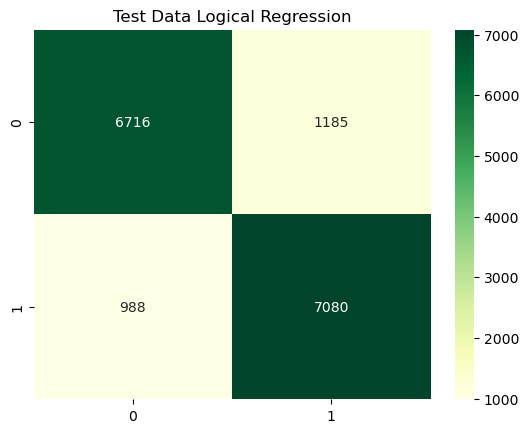

In [121]:
sns.heatmap((metrics.confusion_matrix(y_test,y_test_pred_lr)),annot=True,fmt='.5g',cmap="YlGn").set_title('Test Data Logical Regression');

<h2 style='text-align: left;'>Random Forest Classifier</h2>

In [153]:
from sklearn.ensemble import RandomForestClassifier 
rFc= RandomForestClassifier(n_estimators= 10, criterion="entropy")
start_time = time.time()
rFc.fit(X_train_scaled, y_train)
y_test_pred_rf =rFc.predict(X_test_scaled)
end_time = time.time()
model_score_train_rf=rFc.score(X_train_scaled,y_train)
model_score_test_rf=rFc.score(X_test_scaled,y_test)
model_test_r2_rf = r2_score(y_test,y_test_pred_rf)
cm_rf= confusion_matrix(y_test, y_test_pred_rf) 
elapsed_time_rf = end_time - start_time

In [154]:
print("RandomForestClassifier Observation:")
print("-"*50)
print("-->model_score_train: {:.4f}".format(model_score_train_rf))
print("-->model_score_test: {:.4f}".format(model_score_test_rf))
print("-->model_test_r2: {:.4f}".format(model_test_r2_rf))
print("-->confusion_matrix: \n",cm_rf)
print(f"Elapsed time: {elapsed_time_rf} seconds")

RandomForestClassifier Observation:
--------------------------------------------------
-->model_score_train: 0.9951
-->model_score_test: 0.9337
-->model_test_r2: 0.7347
-->confusion_matrix: 
 [[7413  488]
 [ 571 7497]]
Elapsed time: 1.6548683643341064 seconds


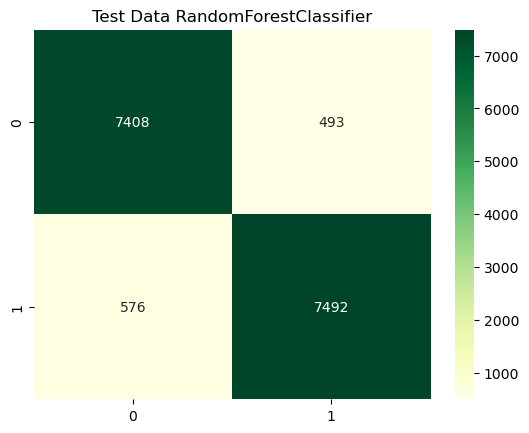

In [137]:
sns.heatmap((metrics.confusion_matrix(y_test,y_test_pred_rf)),annot=True,fmt='.5g',cmap="YlGn").set_title('Test Data RandomForestClassifier');

<h2 style='text-align: left;'>Decision Tree Classifier</h2>

In [138]:
from sklearn.tree import DecisionTreeClassifier  
dTc= DecisionTreeClassifier(criterion='entropy', random_state=0)  
start_time = time.time()
dTc.fit(X_train_scaled, y_train)  
y_test_pred_dc=dTc.predict(X_test_scaled)
end_time = time.time()
model_score_train_dc=dTc.score(X_train_scaled,y_train)
model_score_test_dc=dTc.score(X_test_scaled,y_test)
model_test_r2_dc = r2_score(y_test,y_test_pred_dc)
cm_dc= confusion_matrix(y_test, y_test_pred_dc)  
elapsed_time_dc= end_time - start_time

In [139]:
print("DecisionTreeClassifier Observation:")
print("-"*50)
print("-->model_score_train: {:.4f}".format(model_score_train_dc))
print("-->model_score_test: {:.4f}".format(model_score_test_dc))
print("-->model_test_r2: {:.4f}".format(model_test_r2_dc))
print("-->confusion_matrix: \n",cm_dc)
print(f"Elapsed time: {elapsed_time_dc} seconds")

DecisionTreeClassifier Observation:
--------------------------------------------------
-->model_score_train: 0.9992
-->model_score_test: 0.9079
-->model_test_r2: 0.6315
-->confusion_matrix: 
 [[7050  851]
 [ 620 7448]]
Elapsed time: 0.8644747734069824 seconds


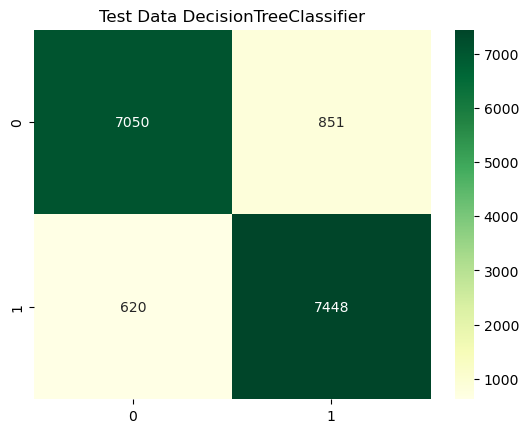

In [140]:
sns.heatmap((metrics.confusion_matrix(y_test,y_test_pred_dc)),annot=True,fmt='.5g',cmap="YlGn").set_title('Test Data DecisionTreeClassifier');

<h2 style='text-align: left;'>GaussianNB </h2>

In [141]:
from sklearn.naive_bayes import GaussianNB  
nBc = GaussianNB()
start_time = time.time()
nBc.fit(X_train_scaled, y_train)  
y_test_pred_nb=nBc.predict(X_test_scaled)
end_time = time.time()
model_score_train_nb=nBc.score(X_train_scaled,y_train)
model_score_test_nb=nBc.score(X_test_scaled,y_test)
model_test_r2_nb = r2_score(y_test,y_test_pred_nb)
cm_nb= confusion_matrix(y_test, y_test_pred_nb)  
elapsed_time_nb= end_time - start_time

In [142]:
print("GaussianNB  Observation:")
print("-"*50)
print("-->model_score_train: {:.4f}".format(model_score_train_nb))
print("-->model_score_test: {:.4f}".format(model_score_test_nb))
print("-->model_test_r2: {:.4f}".format(model_test_r2_nb))
print("-->confusion_matrix: \n",cm_nb)
print(f"Elapsed time: {elapsed_time_nb} seconds")

GaussianNB  Observation:
--------------------------------------------------
-->model_score_train: 0.7222
-->model_score_test: 0.7197
-->model_test_r2: -0.1213
-->confusion_matrix: 
 [[4312 3589]
 [ 887 7181]]
Elapsed time: 0.11369729042053223 seconds


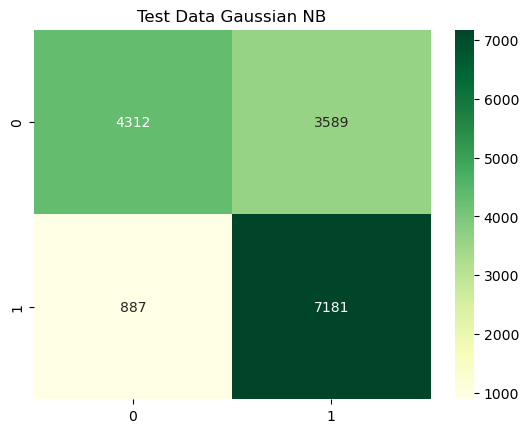

In [143]:
sns.heatmap((metrics.confusion_matrix(y_test,y_test_pred_nb)),annot=True,fmt='.5g',cmap="YlGn").set_title('Test Data Gaussian NB');

<h2 style='text-align: left;'>Support vector classifier</h2>

In [144]:
from sklearn.svm import SVC # "Support vector classifier"  
svc = SVC()  
start_time = time.time()
svc.fit(X_train_scaled, y_train)   
y_test_pred_svc=dTc.predict(X_test_scaled)
end_time = time.time()
model_score_train_svc=svc.score(X_train_scaled,y_train)
model_score_test_svc=svc.score(X_test_scaled,y_test)
model_test_r2_svc = r2_score(y_test,y_test_pred_svc)
cm_svc= confusion_matrix(y_test, y_test_pred_svc) 
elapsed_time_svc= end_time - start_time

In [145]:
print("Support vector classifier  Observation:")
print("-"*50)
print("-->model_score_train: {:.4f}".format(model_score_train_svc))
print("-->model_score_test: {:.4f}".format(model_score_test_svc))
print("-->model_test_r2: {:.4f}".format(model_test_r2_svc))
print("-->confusion_matrix: \n",cm_svc)
print(f"Elapsed time: {elapsed_time_svc} seconds")

Support vector classifier  Observation:
--------------------------------------------------
-->model_score_train: 0.8992
-->model_score_test: 0.8900
-->model_test_r2: 0.6315
-->confusion_matrix: 
 [[7050  851]
 [ 620 7448]]
Elapsed time: 250.78810858726501 seconds


In [ ]:
from sklearn import metrics
sns.heatmap((metrics.confusion_matrix(y_test,y_test_pred_svc)),annot=True,fmt='.5g',cmap="YlGn").set_title('Test Data SVM');

<h3 style='text-align: left;'>Analysis</h3>
<ul>
    <li>Logistic Regression model given 0.8622 Accuracy for training data,0.8625 accuracy for test data and  0.4501 r2 score.</li>
    <li>RandomForestClassifier model given 0.9956 Accuracy for training data,0.9317 accuracy for test data and  0.7269 r2 score.</li>
    <li>DecisionTreeClassifier model given 0.9991 Accuracy for training data,0.9071 accuracy for test data and -0.0920 r2 score.</li>
    <li>GaussianNB model given 0.7260 Accuracy for training data,0.7270 accuracy for test data and  0.4501 r2 score.</li>
    <li>Support vector classifiermodel given 0.8984 Accuracy for training data,0.8875 accuracy for test data and  0.6285 r2 score.</li>
    <li>The Execution  time is high for SVM algorithm and Low for Gaussian NB</li>
</ul>
<h1 style='text-align: left;'>Model Validation</h1>

In [149]:
#r2_Scores
data = {'model_name': ["Logistic regression","RandomForestClassifier",'DecisionTreeClassifier',"GaussianNB","Support vector classifier"],
        'r2_score': [model_test_r2_lr,model_test_r2_rf,model_test_r2_dc,model_test_r2_nb,model_test_r2_svc]
        }

df_ = pd.DataFrame(data)

print(df_)

                  model_name  r2_score
0        Logistic regression  0.455636
1     RandomForestClassifier  0.732202
2     DecisionTreeClassifier  0.631496
3                 GaussianNB -0.121295
4  Support vector classifier  0.631496


In [155]:
data_1 = {'Model_name': ["Logistic regression","RandomForestClassifier",'DecisionTreeClassifier',"GaussianNB"],
        'Time_takenby_model': [elapsed_time,elapsed_time_rf,elapsed_time_dc,elapsed_time_nb]
        }

df_1 = pd.DataFrame(data_1)

print(df_1)

               Model_name  Time_takenby_model
0     Logistic regression            0.233311
1  RandomForestClassifier            1.654868
2  DecisionTreeClassifier            0.864475
3              GaussianNB            0.113697


<h3 style='text-align: left;'>Analysis</h3>
<ul>
    <li>To know the best model among all Models we created a dataframe of model name and its r2 score</li>
    <li>Here we can observe the r2 score of Random Forest classifier model is better than Other models</li>
    <li>SVM algorithm records have high execution time.so we are ignoring it in Bar plot.</li>
</ul>
<h1 style='text-align: left;'>Model Comparision</h1>

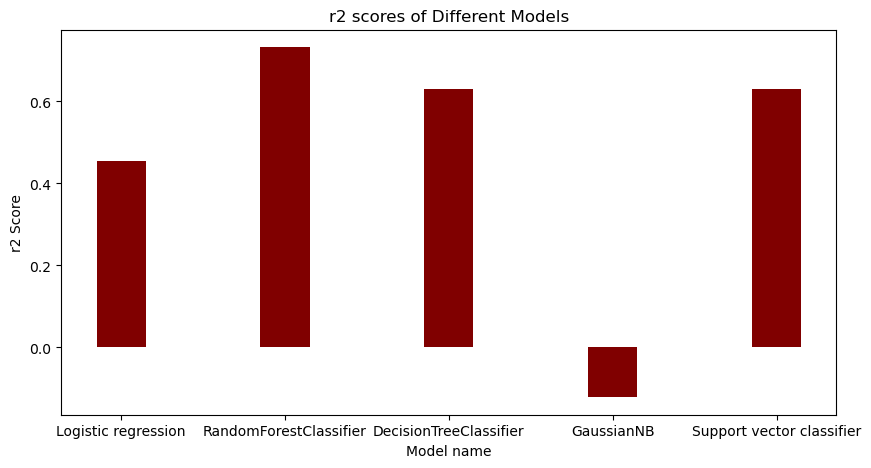

In [156]:
x_ax=df_["model_name"]
y_ax=df_["r2_score"]
fig = plt.figure(figsize = (10, 5))
plt.bar(x_ax,y_ax, color ='maroon',
        width = 0.3)
plt.xlabel("Model name")
plt.ylabel("r2 Score")
plt.title("r2 scores of Different Models")
plt.show()

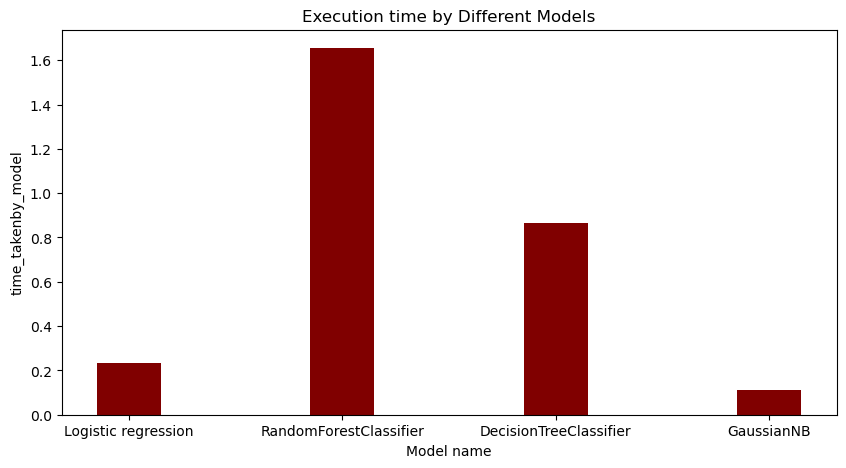

In [157]:
x_axs=df_1["Model_name"]
y_axs=df_1["Time_takenby_model"]
fig = plt.figure(figsize = (10, 5))
plt.bar(x_axs,y_axs, color ='maroon',
        width = 0.3)
plt.xlabel("Model name")
plt.ylabel("time_takenby_model")
plt.title("Execution time by Different Models")
plt.show()

<h3 style='text-align: left;'>Analysis</h3>
<ul>
    <li>The above shown Bar plot says that Random Forest Classifier has the better r2 score.</li>
    <li>The above Execution time bar plot says that Random Forest Classifier is high.</li>
</ul>

<h1 style='text-align: left;'>Conclusion</h1>
<ul>
    <li>By Comparing r2 scores of all the Models,RandomForestClassifier algorithm got high r2 score.</li>
    <li>But the Execution time is a little bit high than Other Models.</li>
    <li>Accuracy and r2 scores plays key role for Machine Learning Algorithm.</li>
    <li><b>Random Forest Classifier</b> have 93% accuracy and 73% r2 score and it has taken 1.654868 seconds for execution.</li>
    <li><b>Decision Tree Classifier</b> have 90% accuracy and 63% r2 score and it has taken 0.864475 seconds for execution.</li>
    <li>So,We can choose<b>Random Forest Classifier or Decision Tree Classifier</b> to predict Effectiveness as both of them are showing good Accuracy and r2 Score. </li>
</ul> 